# Climate Change Belief Analysis Prediction

<img src = "climatechange.jpg" style = "width:800px;height:400px"/>

The climate change belief analaysis prediction is challenge by Explore Data Science Academy (EDSA) which is about using classification to create a machine learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. [Click here for more details](https://www.kaggle.com/c/edsa-climate-change-belief-analysis-2021/overview "Please click here")

## Background

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals.

They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

This project is about classifying whether a person believes in climate change or not based on their tweet data. [More information here](https://www.kaggle.com/c/edsa-climate-change-belief-analysis-2021/overview "More details")

## Approach

Here we put a summary of our approach.

## Data pre-processing

Data cleaning and getting our data into right format for our model.

### Libraries

We start by loading libraries needed for building our classification model.

In [1]:
# Libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Test-train split function from sklearn
from sklearn.model_selection import train_test_split

# LogisticRegression module from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

### Data

Loading data from a file into our notenook.

In [2]:
# load dataset from a csv file into DataFrames
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
df_train.head(10)

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504
5,-1,RT @seanhannity: NEXT Bill Cunningham and @Mon...,806082908574380032
6,-1,RT @T_S_P_O_O_K_Y: @beardoweird0 @20committee ...,820118259273990144
7,-1,RT @DBloom451: EPA chief Pruitt rightly points...,840025826418667522
8,-1,RT @InfoWarsChannel: Exposed: How world leader...,828670720175644673
9,-1,@Alyssa_Milano Funding climate change is a scam.,859567392761888768


In [8]:
df_test.head(10)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
5,RT @nycjim: Trump muzzles employees of several...,75639
6,@bmastenbrook yes wrote that in 3rd yr Comp Sc...,211536
7,RT @climatehawk1: Indonesian farmers weather #...,569434
8,RT @guardian: British scientists face a ‘huge ...,315368
9,Aid For Agriculture | Sustainable agriculture ...,591733


### Cleaning

This is where we clean our data by dealing with missing, null values and getting data into right format.

#### Summary statistics

In [47]:
df_train.shape

(30759, 3)

Our train dataset has **30759** rows and **3** columns.

In [48]:
df_test.shape

(10546, 2)

Our test dataset has **10546** rows and **2** columns.

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30759 entries, 0 to 30758
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  30759 non-null  int64 
 1   message    30759 non-null  object
 2   tweetid    30759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 721.0+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [16]:
df_train[['message']].describe()

,message
count,30759
unique,28813
top,RT @StephenSchlegel: she's thinking about how ...
freq,361


In [17]:
df_test[['message']].describe()

,message
count,10546
unique,9575
top,RT @StephenSchlegel: she's thinking about how ...
freq,199


The training dataset has **28813** unique tweets and test dataset has **9575** unique tweets. The most common tweet in both datasets is from @StephenSchlegel "she's thinking about how she's going to die because your husband doesn't believe in climate change", it makes sense because this is a retweet "RT".

In [50]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

This confirms that there are no null values in the train dataset.

In [49]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

This confirms that there are no null values in the test dataset. No missing values found in both the training and testing datasets.

#### Emojis???

**I think it will be a great idea to explore the emojis, not remove them. Emojis are extensively used to convey messages nowadays. Change emojis into text?**

#### Convert all text into lowercase

In [3]:
# Changing all the text into lowercase in train dataset
# Create new column called tweet_cleaned
df_train['tweet_cleaned']  = df_train['message'].str.lower()
df_train.head(10)

,sentiment,message,tweetid,tweet_cleaned
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,rt @darreljorstad: funny as hell! canada deman...
1,-1,All the biggest lies about climate change and ...,925046776553529344,all the biggest lies about climate change and ...
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,the coming revelation of the $q$global warming...
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,rt @dineshdsouza: let's see if the world ends ...
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,rt @stevesgoddard: obama has no control over t...
5,-1,RT @seanhannity: NEXT Bill Cunningham and @Mon...,806082908574380032,rt @seanhannity: next bill cunningham and @mon...
6,-1,RT @T_S_P_O_O_K_Y: @beardoweird0 @20committee ...,820118259273990144,rt @t_s_p_o_o_k_y: @beardoweird0 @20committee ...
7,-1,RT @DBloom451: EPA chief Pruitt rightly points...,840025826418667522,rt @dbloom451: epa chief pruitt rightly points...
8,-1,RT @InfoWarsChannel: Exposed: How world leader...,828670720175644673,rt @infowarschannel: exposed: how world leader...
9,-1,@Alyssa_Milano Funding climate change is a scam.,859567392761888768,@alyssa_milano funding climate change is a scam.


In [4]:
# Changing all the text into lowercase in test dataset
# Create new column called tweet_cleaded
df_test['tweet_cleaned']  = df_test['message'].str.lower()
df_test.head(10)

,message,tweetid,tweet_cleaned
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,"the scary, unimpeachable evidence that climate..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,@karoli @morgfair @osborneink @dailykos \nputi...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,rt @fakewillmoore: 'female orgasms cause globa...
5,RT @nycjim: Trump muzzles employees of several...,75639,rt @nycjim: trump muzzles employees of several...
6,@bmastenbrook yes wrote that in 3rd yr Comp Sc...,211536,@bmastenbrook yes wrote that in 3rd yr comp sc...
7,RT @climatehawk1: Indonesian farmers weather #...,569434,rt @climatehawk1: indonesian farmers weather #...
8,RT @guardian: British scientists face a ‘huge ...,315368,rt @guardian: british scientists face a ‘huge ...
9,Aid For Agriculture | Sustainable agriculture ...,591733,aid for agriculture | sustainable agriculture ...


#### Removing links

In [6]:
# links in the training data
train_tweet = []
new_list = list(df_train['tweet_cleaned'])
for tweet in new_list:
    tweet = re.sub(r"http\S+", '', tweet, flags=re.MULTILINE)
    train_tweet.append(tweet)
    
df_train['tweet_cleaned'] = train_tweet

# links in the testing data
test_tweet = []
new_list1 = list(df_test['tweet_cleaned'])
for tweet in new_list1:
    tweet = re.sub(r"http\S+", '', tweet, flags=re.MULTILINE)
    test_tweet.append(tweet)
    
df_test['tweet_cleaned'] = test_tweet

In [6]:
# checking if the links were removed
df_train.head(10)

,sentiment,message,tweetid,tweet_cleaned
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,rt @darreljorstad: funny as hell! canada deman...
1,-1,All the biggest lies about climate change and ...,925046776553529344,all the biggest lies about climate change and ...
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,the coming revelation of the $q$global warming...
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,rt @dineshdsouza: let's see if the world ends ...
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,rt @stevesgoddard: obama has no control over t...
5,-1,RT @seanhannity: NEXT Bill Cunningham and @Mon...,806082908574380032,rt @seanhannity: next bill cunningham and @mon...
6,-1,RT @T_S_P_O_O_K_Y: @beardoweird0 @20committee ...,820118259273990144,rt @t_s_p_o_o_k_y: @beardoweird0 @20committee ...
7,-1,RT @DBloom451: EPA chief Pruitt rightly points...,840025826418667522,rt @dbloom451: epa chief pruitt rightly points...
8,-1,RT @InfoWarsChannel: Exposed: How world leader...,828670720175644673,rt @infowarschannel: exposed: how world leader...
9,-1,@Alyssa_Milano Funding climate change is a scam.,859567392761888768,@alyssa_milano funding climate change is a scam.


In [13]:
df_test.head(10)

,message,tweetid,tweet_cleaned
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,"the scary, unimpeachable evidence that climate..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,@karoli @morgfair @osborneink @dailykos \nputi...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,rt @fakewillmoore: 'female orgasms cause globa...
5,RT @nycjim: Trump muzzles employees of several...,75639,rt @nycjim: trump muzzles employees of several...
6,@bmastenbrook yes wrote that in 3rd yr Comp Sc...,211536,@bmastenbrook yes wrote that in 3rd yr comp sc...
7,RT @climatehawk1: Indonesian farmers weather #...,569434,rt @climatehawk1: indonesian farmers weather #...
8,RT @guardian: British scientists face a ‘huge ...,315368,rt @guardian: british scientists face a ‘huge ...
9,Aid For Agriculture | Sustainable agriculture ...,591733,aid for agriculture | sustainable agriculture ...


#### Removing the twitter "@" handles

In [7]:
# function removes the twitter handles
def handles_removed(tweet, pattern):
    
    all_find = re.findall(pattern, tweet)
    for word in all_find:
        tweet = re.sub(word, '', tweet)
    return tweet

df_train['tweets_cleaned'] = np.vectorize(handles_removed)(df_train['tweet_cleaned'], "@[\w]*") 
df_test['tweets_cleaned'] = np.vectorize(handles_removed)(df_test['tweet_cleaned'], "@[\w]*") 

In [15]:
df_train.head(10)

,sentiment,message,tweetid,tweet_cleaned,tweets_cleaned
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,rt @darreljorstad: funny as hell! canada deman...,rt : funny as hell! canada demands 'gender rig...
1,-1,All the biggest lies about climate change and ...,925046776553529344,all the biggest lies about climate change and ...,all the biggest lies about climate change and ...
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,the coming revelation of the $q$global warming...,the coming revelation of the $q$global warming...
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,rt @dineshdsouza: let's see if the world ends ...,rt : let's see if the world ends when 's clim...
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,rt @stevesgoddard: obama has no control over t...,rt : obama has no control over the climate. he...
5,-1,RT @seanhannity: NEXT Bill Cunningham and @Mon...,806082908574380032,rt @seanhannity: next bill cunningham and @mon...,rt : next bill cunningham and weigh in on the...
6,-1,RT @T_S_P_O_O_K_Y: @beardoweird0 @20committee ...,820118259273990144,rt @t_s_p_o_o_k_y: @beardoweird0 @20committee ...,rt : i actually have a degree in environment...
7,-1,RT @DBloom451: EPA chief Pruitt rightly points...,840025826418667522,rt @dbloom451: epa chief pruitt rightly points...,rt : epa chief pruitt rightly points out carbo...
8,-1,RT @InfoWarsChannel: Exposed: How world leader...,828670720175644673,rt @infowarschannel: exposed: how world leader...,rt : exposed: how world leaders were duped int...
9,-1,@Alyssa_Milano Funding climate change is a scam.,859567392761888768,@alyssa_milano funding climate change is a scam.,funding climate change is a scam.


In [16]:
df_test.head(10)

,message,tweetid,tweet_cleaned,tweets_cleaned
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...,europe will now be looking to china to make su...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...,combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,"the scary, unimpeachable evidence that climate...","the scary, unimpeachable evidence that climate..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,@karoli @morgfair @osborneink @dailykos \nputi...,\nputin got to you too jill ! \ntrump does...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,rt @fakewillmoore: 'female orgasms cause globa...,rt : 'female orgasms cause global warming!'\n-...
5,RT @nycjim: Trump muzzles employees of several...,75639,rt @nycjim: trump muzzles employees of several...,rt : trump muzzles employees of several gov’t ...
6,@bmastenbrook yes wrote that in 3rd yr Comp Sc...,211536,@bmastenbrook yes wrote that in 3rd yr comp sc...,yes wrote that in 3rd yr comp sci ethics part...
7,RT @climatehawk1: Indonesian farmers weather #...,569434,rt @climatehawk1: indonesian farmers weather #...,rt : indonesian farmers weather #climate chang...
8,RT @guardian: British scientists face a ‘huge ...,315368,rt @guardian: british scientists face a ‘huge ...,rt : british scientists face a ‘huge hit’ if t...
9,Aid For Agriculture | Sustainable agriculture ...,591733,aid for agriculture | sustainable agriculture ...,aid for agriculture | sustainable agriculture ...


#### Removing the "RT" symbol

In [8]:
# remove retweet symbols in the training data
train_tweet = []
new_list = list(df_train['tweets_cleaned'])
for tweet in new_list:
    tweet = re.sub("rt :", '', tweet, flags=re.MULTILINE)
    train_tweet.append(tweet)
    
df_train['tweets_cleaned'] = train_tweet

In [9]:
# remove retweet symbols in the test data
test_tweet = []
new_list1 = list(df_test['tweets_cleaned'])
for tweet in new_list1:
    tweet = re.sub("rt :", '', tweet, flags=re.MULTILINE)
    test_tweet.append(tweet)
    
df_test['tweets_cleaned'] = test_tweet

In [19]:
df_train.head(10)

,sentiment,message,tweetid,tweet_cleaned,tweets_cleaned
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,rt @darreljorstad: funny as hell! canada deman...,funny as hell! canada demands 'gender rights'...
1,-1,All the biggest lies about climate change and ...,925046776553529344,all the biggest lies about climate change and ...,all the biggest lies about climate change and ...
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,the coming revelation of the $q$global warming...,the coming revelation of the $q$global warming...
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,rt @dineshdsouza: let's see if the world ends ...,let's see if the world ends when 's climate ...
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,rt @stevesgoddard: obama has no control over t...,obama has no control over the climate. he is ...
5,-1,RT @seanhannity: NEXT Bill Cunningham and @Mon...,806082908574380032,rt @seanhannity: next bill cunningham and @mon...,next bill cunningham and weigh in on the lef...
6,-1,RT @T_S_P_O_O_K_Y: @beardoweird0 @20committee ...,820118259273990144,rt @t_s_p_o_o_k_y: @beardoweird0 @20committee ...,i actually have a degree in environmental s...
7,-1,RT @DBloom451: EPA chief Pruitt rightly points...,840025826418667522,rt @dbloom451: epa chief pruitt rightly points...,epa chief pruitt rightly points out carbon di...
8,-1,RT @InfoWarsChannel: Exposed: How world leader...,828670720175644673,rt @infowarschannel: exposed: how world leader...,exposed: how world leaders were duped into in...
9,-1,@Alyssa_Milano Funding climate change is a scam.,859567392761888768,@alyssa_milano funding climate change is a scam.,funding climate change is a scam.


In [20]:
df_test.head(10)

,message,tweetid,tweet_cleaned,tweets_cleaned
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...,europe will now be looking to china to make su...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...,combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,"the scary, unimpeachable evidence that climate...","the scary, unimpeachable evidence that climate..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,@karoli @morgfair @osborneink @dailykos \nputi...,\nputin got to you too jill ! \ntrump does...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,rt @fakewillmoore: 'female orgasms cause globa...,'female orgasms cause global warming!'\n-sarc...
5,RT @nycjim: Trump muzzles employees of several...,75639,rt @nycjim: trump muzzles employees of several...,trump muzzles employees of several gov’t agen...
6,@bmastenbrook yes wrote that in 3rd yr Comp Sc...,211536,@bmastenbrook yes wrote that in 3rd yr comp sc...,yes wrote that in 3rd yr comp sci ethics part...
7,RT @climatehawk1: Indonesian farmers weather #...,569434,rt @climatehawk1: indonesian farmers weather #...,indonesian farmers weather #climate change w/...
8,RT @guardian: British scientists face a ‘huge ...,315368,rt @guardian: british scientists face a ‘huge ...,british scientists face a ‘huge hit’ if the u...
9,Aid For Agriculture | Sustainable agriculture ...,591733,aid for agriculture | sustainable agriculture ...,aid for agriculture | sustainable agriculture ...


This confirms the **"RT" symbol was successfully removed** in both training and testing datasets.

#### Removing stopwords

In [10]:
stop = nltk.corpus.stopwords.words('english')

In [11]:
df_train['nostop_words'] = df_train['tweets_cleaned'].apply(lambda m: ' '.join([n for n in m.split() if n not in stop]))
df_test['nostop_words'] = df_test['tweets_cleaned'].apply(lambda m: ' '.join([n for n in m.split() if n not in stop]))

In [23]:
df_train.head(10)

,sentiment,message,tweetid,tweet_cleaned,tweets_cleaned,nostop_words
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,rt @darreljorstad: funny as hell! canada deman...,funny as hell! canada demands 'gender rights'...,funny hell! canada demands 'gender rights' 'cl...
1,-1,All the biggest lies about climate change and ...,925046776553529344,all the biggest lies about climate change and ...,all the biggest lies about climate change and ...,biggest lies climate change global warming deb...
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,the coming revelation of the $q$global warming...,the coming revelation of the $q$global warming...,coming revelation $q$global warming$q$ #fraud ...
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,rt @dineshdsouza: let's see if the world ends ...,let's see if the world ends when 's climate ...,let's see world ends 's climate change rollbac...
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,rt @stevesgoddard: obama has no control over t...,obama has no control over the climate. he is ...,obama control climate. worst snake oil salesma...
5,-1,RT @seanhannity: NEXT Bill Cunningham and @Mon...,806082908574380032,rt @seanhannity: next bill cunningham and @mon...,next bill cunningham and weigh in on the lef...,next bill cunningham weigh left media talking ...
6,-1,RT @T_S_P_O_O_K_Y: @beardoweird0 @20committee ...,820118259273990144,rt @t_s_p_o_o_k_y: @beardoweird0 @20committee ...,i actually have a degree in environmental s...,actually degree environmental studies - yes - ...
7,-1,RT @DBloom451: EPA chief Pruitt rightly points...,840025826418667522,rt @dbloom451: epa chief pruitt rightly points...,epa chief pruitt rightly points out carbon di...,epa chief pruitt rightly points carbon dioxide...
8,-1,RT @InfoWarsChannel: Exposed: How world leader...,828670720175644673,rt @infowarschannel: exposed: how world leader...,exposed: how world leaders were duped into in...,exposed: world leaders duped investing billion...
9,-1,@Alyssa_Milano Funding climate change is a scam.,859567392761888768,@alyssa_milano funding climate change is a scam.,funding climate change is a scam.,funding climate change scam.


In [24]:
df_test.head(10)

,message,tweetid,tweet_cleaned,tweets_cleaned,nostop_words
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...,europe will now be looking to china to make su...,europe looking china make sure alone fighting ...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...,combine this with the polling of staffers re c...,combine polling staffers climate change womens...
2,"The scary, unimpeachable evidence that climate...",224985,"the scary, unimpeachable evidence that climate...","the scary, unimpeachable evidence that climate...","scary, unimpeachable evidence climate change a..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,@karoli @morgfair @osborneink @dailykos \nputi...,\nputin got to you too jill ! \ntrump does...,putin got jill ! trump believe climate change ...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,rt @fakewillmoore: 'female orgasms cause globa...,'female orgasms cause global warming!'\n-sarc...,'female orgasms cause global warming!' -sarcas...
5,RT @nycjim: Trump muzzles employees of several...,75639,rt @nycjim: trump muzzles employees of several...,trump muzzles employees of several gov’t agen...,trump muzzles employees several gov’t agencies...
6,@bmastenbrook yes wrote that in 3rd yr Comp Sc...,211536,@bmastenbrook yes wrote that in 3rd yr comp sc...,yes wrote that in 3rd yr comp sci ethics part...,yes wrote 3rd yr comp sci ethics part. told cl...
7,RT @climatehawk1: Indonesian farmers weather #...,569434,rt @climatehawk1: indonesian farmers weather #...,indonesian farmers weather #climate change w/...,indonesian farmers weather #climate change w/ ...
8,RT @guardian: British scientists face a ‘huge ...,315368,rt @guardian: british scientists face a ‘huge ...,british scientists face a ‘huge hit’ if the u...,british scientists face ‘huge hit’ us cuts cli...
9,Aid For Agriculture | Sustainable agriculture ...,591733,aid for agriculture | sustainable agriculture ...,aid for agriculture | sustainable agriculture ...,aid agriculture | sustainable agriculture clim...


Stopwords were **successfully removed** in both **training and testing datset**.

#### Tokenization & lemmatization

In [12]:
# tokenization
# function splits text into tokens
def tokenizing(text):
    text = re.split('\W+', text)
    return text

df_train['tweet_tokenized'] = df_train['nostop_words'].apply(lambda m: tokenizing(m))
df_test['tweet_tokenized'] = df_test['nostop_words'].apply(lambda m: tokenizing(m))

In [14]:
df_train.head(10)

,sentiment,message,tweetid,tweet_cleaned,tweets_cleaned,nostop_words,tweet_tokenized
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,rt @darreljorstad: funny as hell! canada deman...,funny as hell! canada demands 'gender rights'...,funny hell! canada demands 'gender rights' 'cl...,"[funny, hell, canada, demands, gender, rights,..."
1,-1,All the biggest lies about climate change and ...,925046776553529344,all the biggest lies about climate change and ...,all the biggest lies about climate change and ...,biggest lies climate change global warming deb...,"[biggest, lies, climate, change, global, warmi..."
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,the coming revelation of the $q$global warming...,the coming revelation of the $q$global warming...,coming revelation $q$global warming$q$ #fraud ...,"[coming, revelation, q, global, warming, q, fr..."
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,rt @dineshdsouza: let's see if the world ends ...,let's see if the world ends when 's climate ...,let's see world ends 's climate change rollbac...,"[let, s, see, world, ends, s, climate, change,..."
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,rt @stevesgoddard: obama has no control over t...,obama has no control over the climate. he is ...,obama control climate. worst snake oil salesma...,"[obama, control, climate, worst, snake, oil, s..."
5,-1,RT @seanhannity: NEXT Bill Cunningham and @Mon...,806082908574380032,rt @seanhannity: next bill cunningham and @mon...,next bill cunningham and weigh in on the lef...,next bill cunningham weigh left media talking ...,"[next, bill, cunningham, weigh, left, media, t..."
6,-1,RT @T_S_P_O_O_K_Y: @beardoweird0 @20committee ...,820118259273990144,rt @t_s_p_o_o_k_y: @beardoweird0 @20committee ...,i actually have a degree in environmental s...,actually degree environmental studies - yes - ...,"[actually, degree, environmental, studies, yes..."
7,-1,RT @DBloom451: EPA chief Pruitt rightly points...,840025826418667522,rt @dbloom451: epa chief pruitt rightly points...,epa chief pruitt rightly points out carbon di...,epa chief pruitt rightly points carbon dioxide...,"[epa, chief, pruitt, rightly, points, carbon, ..."
8,-1,RT @InfoWarsChannel: Exposed: How world leader...,828670720175644673,rt @infowarschannel: exposed: how world leader...,exposed: how world leaders were duped into in...,exposed: world leaders duped investing billion...,"[exposed, world, leaders, duped, investing, bi..."
9,-1,@Alyssa_Milano Funding climate change is a scam.,859567392761888768,@alyssa_milano funding climate change is a scam.,funding climate change is a scam.,funding climate change scam.,"[funding, climate, change, scam, ]"


In [15]:
df_train.head(10)

,sentiment,message,tweetid,tweet_cleaned,tweets_cleaned,nostop_words,tweet_tokenized
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,rt @darreljorstad: funny as hell! canada deman...,funny as hell! canada demands 'gender rights'...,funny hell! canada demands 'gender rights' 'cl...,"[funny, hell, canada, demands, gender, rights,..."
1,-1,All the biggest lies about climate change and ...,925046776553529344,all the biggest lies about climate change and ...,all the biggest lies about climate change and ...,biggest lies climate change global warming deb...,"[biggest, lies, climate, change, global, warmi..."
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,the coming revelation of the $q$global warming...,the coming revelation of the $q$global warming...,coming revelation $q$global warming$q$ #fraud ...,"[coming, revelation, q, global, warming, q, fr..."
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,rt @dineshdsouza: let's see if the world ends ...,let's see if the world ends when 's climate ...,let's see world ends 's climate change rollbac...,"[let, s, see, world, ends, s, climate, change,..."
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,rt @stevesgoddard: obama has no control over t...,obama has no control over the climate. he is ...,obama control climate. worst snake oil salesma...,"[obama, control, climate, worst, snake, oil, s..."
5,-1,RT @seanhannity: NEXT Bill Cunningham and @Mon...,806082908574380032,rt @seanhannity: next bill cunningham and @mon...,next bill cunningham and weigh in on the lef...,next bill cunningham weigh left media talking ...,"[next, bill, cunningham, weigh, left, media, t..."
6,-1,RT @T_S_P_O_O_K_Y: @beardoweird0 @20committee ...,820118259273990144,rt @t_s_p_o_o_k_y: @beardoweird0 @20committee ...,i actually have a degree in environmental s...,actually degree environmental studies - yes - ...,"[actually, degree, environmental, studies, yes..."
7,-1,RT @DBloom451: EPA chief Pruitt rightly points...,840025826418667522,rt @dbloom451: epa chief pruitt rightly points...,epa chief pruitt rightly points out carbon di...,epa chief pruitt rightly points carbon dioxide...,"[epa, chief, pruitt, rightly, points, carbon, ..."
8,-1,RT @InfoWarsChannel: Exposed: How world leader...,828670720175644673,rt @infowarschannel: exposed: how world leader...,exposed: how world leaders were duped into in...,exposed: world leaders duped investing billion...,"[exposed, world, leaders, duped, investing, bi..."
9,-1,@Alyssa_Milano Funding climate change is a scam.,859567392761888768,@alyssa_milano funding climate change is a scam.,funding climate change is a scam.,funding climate change scam.,"[funding, climate, change, scam, ]"


In [13]:
# lemmatization
# function to convert text into their stem words

train_tokens = df_train['tweet_tokenized']
test_tokens = df_test['tweet_tokenized']

lemmatizer = WordNetLemmatizer()

train_tokens = train_tokens.apply(lambda m: [lemmatizer.lemmatize(x) for x in m])
test_tokens = test_tokens.apply(lambda m: [lemmatizer.lemmatize(x) for x in m])

df_train['tweet_lemmatized'] = train_tokens
df_test['tweet_lemmatized'] = test_tokens

In [19]:
df_train.head(10)

,sentiment,message,tweetid,tweet_cleaned,tweets_cleaned,nostop_words,tweet_tokenized,tweet_lemmatized
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553,rt @darreljorstad: funny as hell! canada deman...,funny as hell! canada demands 'gender rights'...,funny hell! canada demands 'gender rights' 'cl...,"[funny, hell, canada, demands, gender, rights,...","[funny, hell, canada, demand, gender, right, c..."
1,-1,All the biggest lies about climate change and ...,925046776553529344,all the biggest lies about climate change and ...,all the biggest lies about climate change and ...,biggest lies climate change global warming deb...,"[biggest, lies, climate, change, global, warmi...","[biggest, lie, climate, change, global, warmin..."
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305,the coming revelation of the $q$global warming...,the coming revelation of the $q$global warming...,coming revelation $q$global warming$q$ #fraud ...,"[coming, revelation, q, global, warming, q, fr...","[coming, revelation, q, global, warming, q, fr..."
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072,rt @dineshdsouza: let's see if the world ends ...,let's see if the world ends when 's climate ...,let's see world ends 's climate change rollbac...,"[let, s, see, world, ends, s, climate, change,...","[let, s, see, world, end, s, climate, change, ..."
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504,rt @stevesgoddard: obama has no control over t...,obama has no control over the climate. he is ...,obama control climate. worst snake oil salesma...,"[obama, control, climate, worst, snake, oil, s...","[obama, control, climate, worst, snake, oil, s..."
5,-1,RT @seanhannity: NEXT Bill Cunningham and @Mon...,806082908574380032,rt @seanhannity: next bill cunningham and @mon...,next bill cunningham and weigh in on the lef...,next bill cunningham weigh left media talking ...,"[next, bill, cunningham, weigh, left, media, t...","[next, bill, cunningham, weigh, left, medium, ..."
6,-1,RT @T_S_P_O_O_K_Y: @beardoweird0 @20committee ...,820118259273990144,rt @t_s_p_o_o_k_y: @beardoweird0 @20committee ...,i actually have a degree in environmental s...,actually degree environmental studies - yes - ...,"[actually, degree, environmental, studies, yes...","[actually, degree, environmental, study, yes, ..."
7,-1,RT @DBloom451: EPA chief Pruitt rightly points...,840025826418667522,rt @dbloom451: epa chief pruitt rightly points...,epa chief pruitt rightly points out carbon di...,epa chief pruitt rightly points carbon dioxide...,"[epa, chief, pruitt, rightly, points, carbon, ...","[epa, chief, pruitt, rightly, point, carbon, d..."
8,-1,RT @InfoWarsChannel: Exposed: How world leader...,828670720175644673,rt @infowarschannel: exposed: how world leader...,exposed: how world leaders were duped into in...,exposed: world leaders duped investing billion...,"[exposed, world, leaders, duped, investing, bi...","[exposed, world, leader, duped, investing, bil..."
9,-1,@Alyssa_Milano Funding climate change is a scam.,859567392761888768,@alyssa_milano funding climate change is a scam.,funding climate change is a scam.,funding climate change scam.,"[funding, climate, change, scam, ]","[funding, climate, change, scam, ]"


In [20]:
df_test.head(10)

,message,tweetid,tweet_cleaned,tweets_cleaned,nostop_words,tweet_tokenized,tweet_lemmatized
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...,europe will now be looking to china to make su...,europe looking china make sure alone fighting ...,"[europe, looking, china, make, sure, alone, fi...","[europe, looking, china, make, sure, alone, fi..."
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...,combine this with the polling of staffers re c...,combine polling staffers climate change womens...,"[combine, polling, staffers, climate, change, ...","[combine, polling, staffer, climate, change, w..."
2,"The scary, unimpeachable evidence that climate...",224985,"the scary, unimpeachable evidence that climate...","the scary, unimpeachable evidence that climate...","scary, unimpeachable evidence climate change a...","[scary, unimpeachable, evidence, climate, chan...","[scary, unimpeachable, evidence, climate, chan..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,@karoli @morgfair @osborneink @dailykos \nputi...,\nputin got to you too jill ! \ntrump does...,putin got jill ! trump believe climate change ...,"[putin, got, jill, trump, believe, climate, ch...","[putin, got, jill, trump, believe, climate, ch..."
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,rt @fakewillmoore: 'female orgasms cause globa...,'female orgasms cause global warming!'\n-sarc...,'female orgasms cause global warming!' -sarcas...,"[, female, orgasms, cause, global, warming, sa...","[, female, orgasm, cause, global, warming, sar..."
5,RT @nycjim: Trump muzzles employees of several...,75639,rt @nycjim: trump muzzles employees of several...,trump muzzles employees of several gov’t agen...,trump muzzles employees several gov’t agencies...,"[trump, muzzles, employees, several, gov, t, a...","[trump, muzzle, employee, several, gov, t, age..."
6,@bmastenbrook yes wrote that in 3rd yr Comp Sc...,211536,@bmastenbrook yes wrote that in 3rd yr comp sc...,yes wrote that in 3rd yr comp sci ethics part...,yes wrote 3rd yr comp sci ethics part. told cl...,"[yes, wrote, 3rd, yr, comp, sci, ethics, part,...","[yes, wrote, 3rd, yr, comp, sci, ethic, part, ..."
7,RT @climatehawk1: Indonesian farmers weather #...,569434,rt @climatehawk1: indonesian farmers weather #...,indonesian farmers weather #climate change w/...,indonesian farmers weather #climate change w/ ...,"[indonesian, farmers, weather, climate, change...","[indonesian, farmer, weather, climate, change,..."
8,RT @guardian: British scientists face a ‘huge ...,315368,rt @guardian: british scientists face a ‘huge ...,british scientists face a ‘huge hit’ if the u...,british scientists face ‘huge hit’ us cuts cli...,"[british, scientists, face, huge, hit, us, cut...","[british, scientist, face, huge, hit, u, cut, ..."
9,Aid For Agriculture | Sustainable agriculture ...,591733,aid for agriculture | sustainable agriculture ...,aid for agriculture | sustainable agriculture ...,aid agriculture | sustainable agriculture clim...,"[aid, agriculture, sustainable, agriculture, c...","[aid, agriculture, sustainable, agriculture, c..."


## Exploratory Data Analysis (EDA)

Using technoques to find useful features that has significant role on the performance of our models.

#### Sentiment data imbalance

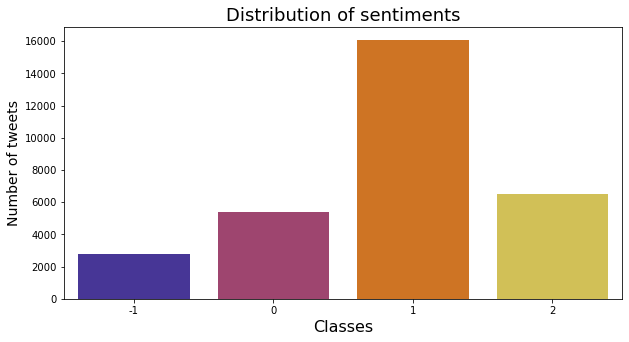

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment',data=df_train, palette='CMRmap')
plt.title('Distribution of sentiments', fontsize=18)
plt.xlabel('Classes', fontsize=16)
plt.ylabel('Number of tweets', fontsize=14)
plt.show()

#### Sentiment vs text length

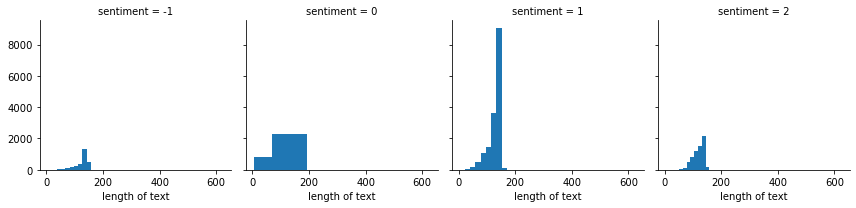

In [15]:
df_train['length of text'] = df_train['message'].apply(len)
g = sns.FacetGrid(df_train,col='sentiment')
g.map(plt.hist,'length of text')
plt.show()

Most tweets in different classes are longer in length.

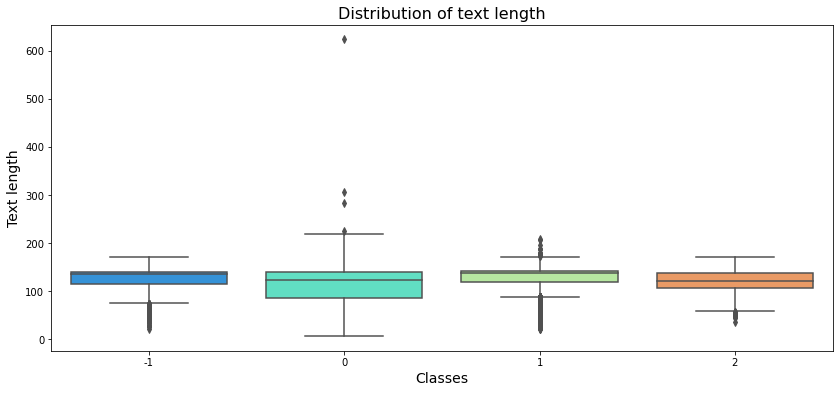

In [16]:
df_train['text length'] = df_train['message'].apply(len)
fig,axis = plt.subplots(figsize=(14,6))
sns.boxplot(x='sentiment', y = 'text length', data=df_train, palette='rainbow')
plt.title('Distribution of text length', fontsize = 16)
plt.xlabel('Classes', fontsize = 14)
plt.ylabel('Text length', fontsize = 14)
plt.show()

#### Correlation

In [17]:
group_sentiment = df_train.groupby('sentiment').mean()

In [18]:
group_sentiment

,tweetid,length of text,text length
sentiment,,,
-1,8.306606e+17,124.055496,124.055496
0,8.398598e+17,110.858704,110.858704
1,8.390188e+17,127.747962,127.747962
2,8.296651e+17,119.553057,119.553057


In [19]:
group_sentiment.corr()

,tweetid,length of text,text length
tweetid,1.000000,-0.238707,-0.238707
length of text,-0.238707,1.000000,1.000000
text length,-0.238707,1.000000,1.000000


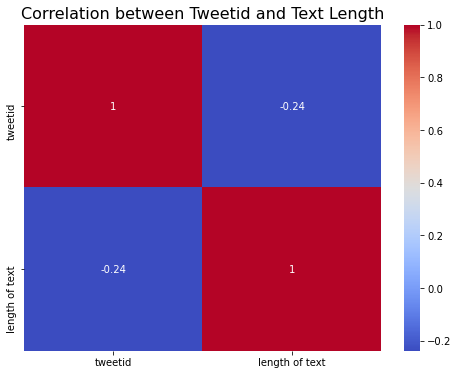

In [62]:
plt.figure(figsize=(8,6))
sns.heatmap(group_sentiment.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation between Tweetid and Text Length', fontsize = 16 )
plt.show()

In [43]:
df_train.corr(method ='pearson')

,sentiment,tweetid,length of text
sentiment,1.000000,-0.013503,0.055308
tweetid,-0.013503,1.000000,0.028572
length of text,0.055308,0.028572,1.000000


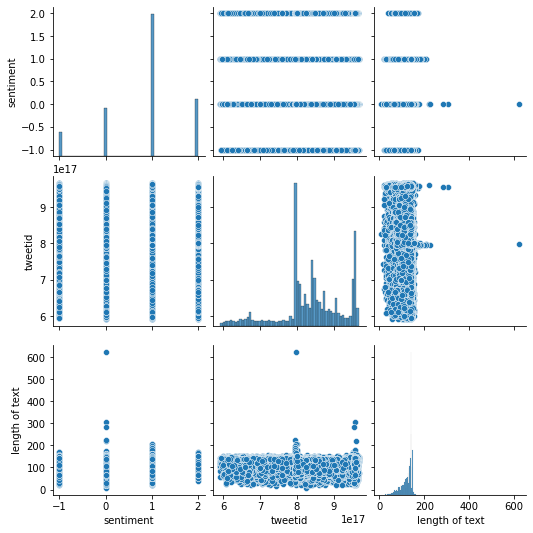

In [44]:
sns.pairplot(df_train)

#### Relationship between sentiment and hashtags

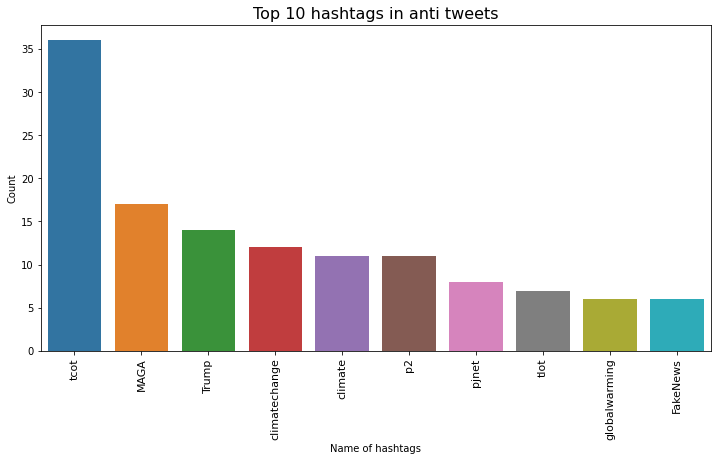

In [89]:
# does not believe in man-made climate change.
# top 10 most frequent hashtags only in...
#...tweets that don not believe in man-made climate change.

df_anti = df_train[df_train.sentiment==-1]

hashtags_anti = []
for message in df_anti['message']:
    
    hashtag = re.findall(r'#(\w+)', message)
    hashtags_anti.append(hashtag)

hashtags_anti = sum(hashtags_anti,[])


a = nltk.FreqDist(hashtags_anti)
b = pd.DataFrame({'Name of hashtags': list(a.keys()), 'Count': list(a.values())})

     
b = b.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(12,6))
ax = sns.barplot(data=b, x= 'Name of hashtags', y = 'Count')
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=11)
plt.title('Top 10 hashtags in anti tweets', fontsize=16)
plt.show()

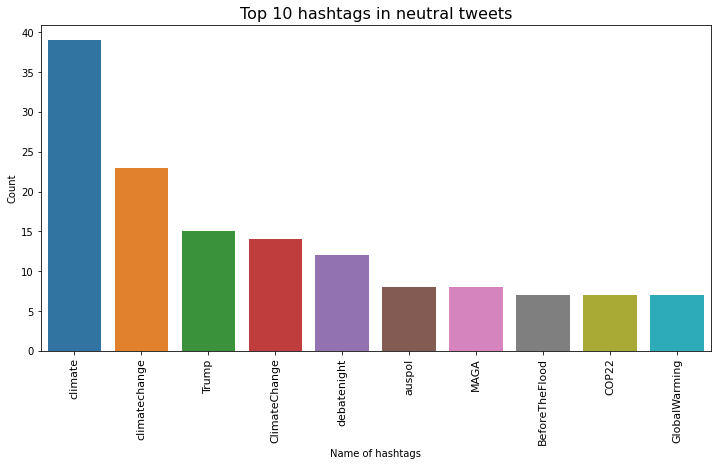

In [88]:
# neutral about man-made climate change.
# neither supports nor refutes the belief of man-made climate change.
# top 10 most frequent hashtags only in neutral tweets.

df_neutral = df_train[df_train.sentiment==0]

hashtags_neutral = []
for message in df_neutral['message']:
    hashtag = re.findall(r'#(\w+)', message)
    hashtags_neutral.append(hashtag)

hashtags_neutral = sum(hashtags_neutral,[])


a = nltk.FreqDist(hashtags_neutral)
b = pd.DataFrame({'Name of hashtags': list(a.keys()), 'Count': list(a.values())})
   
b = b.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(12,6))
ax = sns.barplot(data=b, x= 'Name of hashtags', y = 'Count')
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=11)
plt.title('Top 10 hashtags in neutral tweets', fontsize=16)
plt.show()

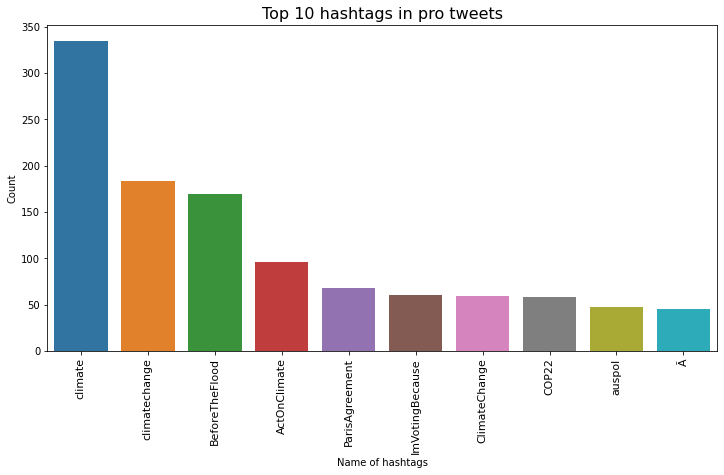

In [85]:
# supports the belief of man-made climate change.
# # top 10 most frequent hashtags only in pro tweets.

df_pro = df_train[df_train.sentiment==1]

hashtags_pro = []

for message in df_pro['message']:
    hashtag = re.findall(r'#(\w+)', message)
    hashtags_pro.append(hashtag)

hashtags_pro = sum(hashtags_pro,[])
a = nltk.FreqDist(hashtags_pro)
b = pd.DataFrame({'Name of hashtags': list(a.keys()), 'Count': list(a.values())})
     
b = b.nlargest(columns='Count', n = 10) 
plt.figure(figsize=(12,6))
ax = sns.barplot(data=b, x= 'Name of hashtags', y = 'Count')
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=11)
plt.title('Top 10 hashtags in pro tweets', fontsize=16)
plt.show()

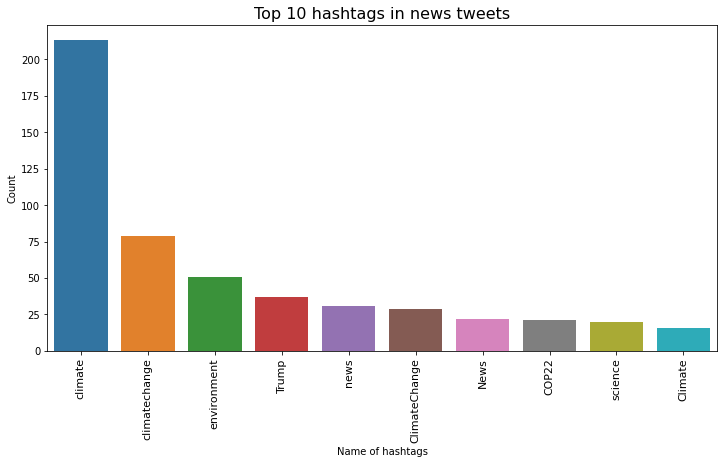

In [87]:
# tweet links to factual news about climate change.
# top 10 most frequent hashtags only in factual tweets from news.

df_news = df_train[df_train.sentiment==2]

hashtags_news = []

for message in df_news['message']:
    hashtag = re.findall(r'#(\w+)', message)
    hashtags_news.append(hashtag)

hashtags_news = sum(hashtags_news,[])


a = nltk.FreqDist(hashtags_news)
b = pd.DataFrame({'Name of hashtags': list(a.keys()), 'Count': list(a.values())})
    
b = b.nlargest(columns='Count', n = 10) 
plt.figure(figsize=(12,6))
ax = sns.barplot(data=b, x= 'Name of hashtags', y = 'Count')
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=11)
plt.title('Top 10 hashtags in news tweets', fontsize=16)
plt.show()

## Model development

In this section, we build our classification models, train, test and finally improve performance of our model.

## Model evaluation

Test the accuracy of our models and compare the results from different classifications models.

## Model deployment

### Savind model

### Model submission

## Conclusions

Which classification models is the best and why?